# **Personal Finance Analysis & Prediction Project**

### Author: Cooper Braun

### Class: CPSC-222 Spring 2025

## **1. Introduction**

This project analyzes my personal financial data in relation to my academic schedule at Gonzaga University to identify spending patterns and predict my spending behavior. As a college student with limited income, I believe effective financial management is essential to my success and well-being. Understanding the relationship between my academic life and spending habits can help me budget more effectively and hopefully develop healthier financial habits that will benefit me in the long run.

### Why This Domain Matters to Me

Personal finance management is particularly important for college students like me who are often experiencing financial independence for the first time. The habits formed during these years can impact financial well-being for someones entire life. By analyzing my own spending in relation to my academic schedule, I hope to gain insights that will help me make more informed decisions and potentially identify patterns in my spending that I wasn't aware of.

### Dataset Format and Collection

My dataset consists of two CSV files:

1. Bank Data (`bank_data.csv`): This contains 205 banking transactions spanning September 2024 to April 2025 (7 months). I collected this data by downloading transaction history from my bank's online portal. Each transaction includes date, description, type, amount, and account balance.
2. Academic Calendar (`academic_calendar.csv`): This contains 152 days of academic data for the same time period. I compiled this information from my class's syllabi/Canvas pages and Gonzaga's online academic calendar from their website, manually creating entries for each day marking lecture periods, exam periods, quiz periods, breaks, and weekends.
3. Merged Data (`merged_data.csv`): This is the primary dataset used for analysis, created by merging the bank and academic data on their respective date fields. This comprehensive dataset combines my financial transactions with their academic context, allowing me to analyze spending patterns in relation to my academic schedule.

### Attributes Description

**Bank Data Attributes:**

* _Date_: Transaction date (YYYY-MM-DD format)
* _Description_: Merchant name or transaction description
* _Type_: Transaction type as labeled by the bank (e.g., "Debit Card", "Direct Payment")
* _Amount_: Dollar amount (negative for spending, positive for deposits)
* _Current balance_: Account balance after transaction
* _Status_: Whether the transaction has posted or is pending

**Academic Calendar Attributes:**

* _date_: Calendar date (YYYY-MM-DD format)
* *academic_event_type*: Type of academic day (e.g., "Regular Classes", "Finals Week", "Spring Vacation")
* *class_activity*: Specific activity for that day (e.g., "Lecture", "Exam", "Quiz", "No Class")

**Merged Data Attributes:**

* All original bank data attributes listed above
* Transaction_Type: Classification as "Credit" or "Debit" based on transaction amount
* Absolute_Amount: Absolute value of the transaction amount
* Day_of_Week: Day of the week for the transaction (e.g., Monday, Tuesday)
* Month: Month of the transaction
* Category: Categorized spending type (e.g., Dining, Retail, Groceries, Transportation)
* Spending_Bin: Size classification of spending:
    * Small (Less than 10)
    * Medium (10-50)
    * Large (50-100)
    * Very Large (More than 100)
* academic_event_type: Type of academic event from academic calendar
* class_activity: Specific class activity from academic calendar
* day_of_week: Day of the week (alternative format)
* period_type: Categorized academic period (Class Period, Assessment Period, Break, Weekend)

### Classification Task

In this project, I am classifying each transaction into one of four spending bins based on the transaction amount (in dollars):

* Small (Less than 10)
* Medium (10-50)
* Large (50-100)
* Very Large (More than 100)

My goal is to predict which spending bin a transaction will fall into based on factors like day of the week, academic period type, and transaction category.

### Potential Impacts and Stakeholders

The results of my analysis could have several impacts:

1. _Personal financial planning_: I can better anticipate spending patterns based on my academic schedule and make more informed budgeting decisions.
2. _Student financial literacy_: Other university students could benefit from similar analyses to better understand their own spending behaviors.
3. _University financial support services_: Student financial advisors could use similar approaches to provide personalized guidance to students.
4. _Financial institutions_: Banks and credit unions serving college communities could develop more targeted financial advice and educational resources.

Key stakeholders include:

* Myself as the primary beneficiary of these insights
* Other university students facing similar financial management challenges
* University financial aid and student support services
* Financial institutions serving student populations
* Parents or family members who may be supporting students financially

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from utils import *

In [2]:
# Load raw data
bank_data, academic_data = load_data("bank_data.csv", "academic_calendar.csv")

print(f"I have {bank_data.shape[0]} banking transactions to analyze")
print(f"My academic calendar spans {academic_data.shape[0]} days")

# A few of my banking transactions to show data
print("Here is a peek at a couple of my recent transactions:")
display(bank_data.head(4))

# A look at my academic calendar
print("And here's a snapshot of my academic calendar:")
display(academic_data.head(4))

I have 205 banking transactions to analyze
My academic calendar spans 152 days
Here is a peek at a couple of my recent transactions:


,Date,Description,Type,Amount,Current balance,Status
0,2025-04-01,Mobile Check Deposit,Check Deposit,2000.00,2617.77,Posted
1,2025-03-31,Interest earned,Interest Earned,0.25,617.77,Posted
2,2025-03-28,Zelle® Payment to Eme,Direct Payment,-27.00,617.52,Posted
3,2025-03-25,DAVES HOT CHICKEN 1307,Debit Card,-29.41,644.52,Posted


And here's a snapshot of my academic calendar:


,date,academic_event_type,class_activity
0,2025-04-01,Regular Classes,Lecture
1,2025-03-31,Regular Classes,Lecture
2,2025-03-30,Weekend,No Class
3,2025-03-29,Weekend,No Class


## **2. Data Preparation**

To make my raw data suitable for analysis, I need to perform several preprocessing steps

### Cleaning the Banking Data

My banking data required several transformations:

In [3]:
# Clean the banking data
bank_data = clean_bank_data(bank_data)

# See how my transactions are categorized
category_counts = bank_data["Category"].value_counts()
print("How my transactions are distributed across categories:")
display(category_counts)

# Check out my spending bins
bin_counts = bank_data[bank_data["Transaction_Type"] == "Debit"]["Spending_Bin"].value_counts()
print("My spending patterns by size:")
display(bin_counts)

How my transactions are distributed across categories:


Category
Dining                   83
Banking & Investments    44
Groceries                31
Retail                   19
Transportation            9
Rent                      5
Utilities                 4
Other                     4
Subscriptions             3
Parking                   3
Name: count, dtype: int64

My spending patterns by size:


Spending_Bin
Medium ($10-$50)               95
Small (Less than $10)          50
Large ($50-$100)               20
Very Large (More than $100)    13
Name: count, dtype: int64

The clean_bank_data() function performs many important transformations:

1. _Date formatting_: Converting string dates to datetime objects for easier temporal analysis
2. _Transaction typing_: Crating a "Transaction_Type" column that identifies each entry as either "Debit" (spending) or "Credit" (income)
3. _Absolute amounts_: Creating an "Absolute_Amount" column to make numerical analysis easier
4. _Temporal features_: Extracting day of week and month transaction dates
5. _Categorization_: Assigning each transaction to a category (Dining, Transportation, etc.) based on the description
6. _Spending bins_: Creating a "Spending_Bin" column that groups transactions by amount

There were no missing values in my banking dataset, so I didn't need to handle those. However, the transaction descriptions required significant normalization to create meaningful categories. I implemented a keyword-based categorization system that examines each description and assigns it to the most appropriate category.

### Cleaning the Academic Data

My academic calendar data also required preprocessing:

In [4]:
# Clean academic data
academic_data = clean_academic_data(academic_data)

# See how most of my sophomore year breaks down
period_counts = academic_data["period_type"].value_counts()
print("How my 2024-2025 school year was structured:")
display(period_counts)

How my 2024-2025 school year was structured:


period_type
Class Period         52
Weekend              42
Break                31
Assessment Period    27
Name: count, dtype: int64

The clean_academic_data() function performs these transactions:

1. _Date formatting_: Converting string dates to datetime objects
2. _Day extraction_: Adding a "day_of_week" column
3. _Period classification_: Creating a "period_type" column that categorizes each day as either:
    * Class Period (regular lecture days)
    * Assessment Period (exams, quizzes, and finals)
    * Break (holidays, vacation days)
    * Weekend (Saturdays and Sundays)

This classification allows me to analyze how different academic contexts affect my spending behavior.

### Merging the Datasets

To connect my financial transactions with their academic context, I merged the datasets on the date:

In [5]:
# Merge banking and academic data
merged_data = merge_datasets(bank_data, academic_data)
print(f"Merged {merged_data.shape[0]} transactions with academic context")

Merged 205 transactions with academic context


The merge_datasets() function joins the two tables using a left join on the date field, ensuring that every transaction is associated with its corresponding academic context. This approach preserves all banking transactions, even if they occurred on days not covered by the academic calendar.

### Data Preparation Challenges

I encountered several challenges during data preparation:

1. _Transaction categorization_: Some of the transaction descriptions were ambiguous or inconsistent. For example, "SAFEWAY" could represent groceries or fuel, depending on the specific location. I had to create a more nuanced categorization system that considered multiple keywords.
2. _Academic period classification_: Determining whether a day was an "Assessment Period" required combining information from both the academic_event_type and class_activity columns.
3. _Temporal alignment_: Some transactions posted on different days than when they actually occurred, particularly for weekend transactions that might not be processed until the Monday after. This could introduce some noise in the day-of-week analysis.
4. _Category boundary decision_: Deciding where to draw the line between spending categories (e.g., whether Target should be in the grocery or retail category) required subjective decisions that could affect the analysis.

These challenges reflect real-world data messiness that required some thought behind their solution and some compromise.

## **3. Exploratory Data Analysis**

With my data prepared, I conducted exploratory analysis to understand my spending patterns and their their relationship with my academic schedule

### Data Aggregation Techniques

I did several aggregation techniques to gain insights:

1. _Category sums_: Aggregating by total spending by category to identify my largest expense categories
2. _Temporal grouping_: Aggregating by day of week, month, and academic period to identify time-based patterns
3. _Academic context grouping_: Comparing spending across different academic periods to understand contextual influences
4. _Combined aggregation_: Creating cross-tabulations of academic periods and spending categories to identify specific behavioral patterns

These techniques help me understand my spending from multiple angles and identify the most important patterns.

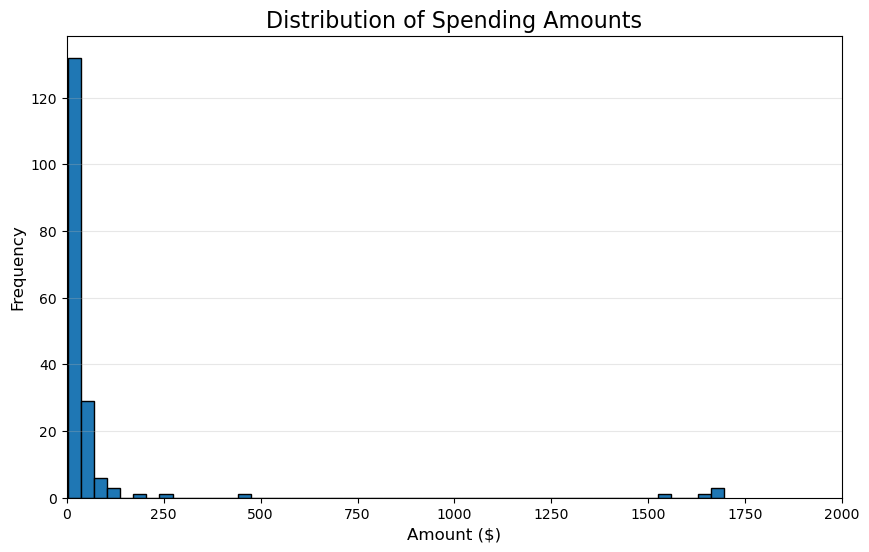

In [6]:
# Get spending statistics
spending_stats = get_spending_statistics(bank_data)

# Overall spending distribution
plot_spending_distribution(bank_data)

### Summary Statistics

I calculated several key summary statistics to quantify my spending patterns:

In [7]:
print("An overview of my spending:")
print(f"Average transaction: ${spending_stats["average"]:.2f}")
print(f"Median transaction: ${spending_stats["median"]:.2f}")
print(f"Largest purchase: ${spending_stats["max"]:.2f}")
print(f"Smallest purchase: ${spending_stats["min"]:.2f}")
print(f"Total spent: ${spending_stats["total"]:.2f}")

An overview of my spending:
Average transaction: $75.21
Median transaction: $20.00
Largest purchase: $1695.63
Smallest purchase: $1.75
Total spent: $13387.45


These statistics provide a quantitative foundation for understanding my financial behavior. The disparity between my mean and median transaction amounts indicates that my spending is right-skewed, with a few large transactions (like my rent payments) pulling the average higher than the median. This suggests that my "average" transaction is actually much smaller than what the mean indicates.

### Visualizations

I created several visualizations to explore different aspects of my spending behavior:

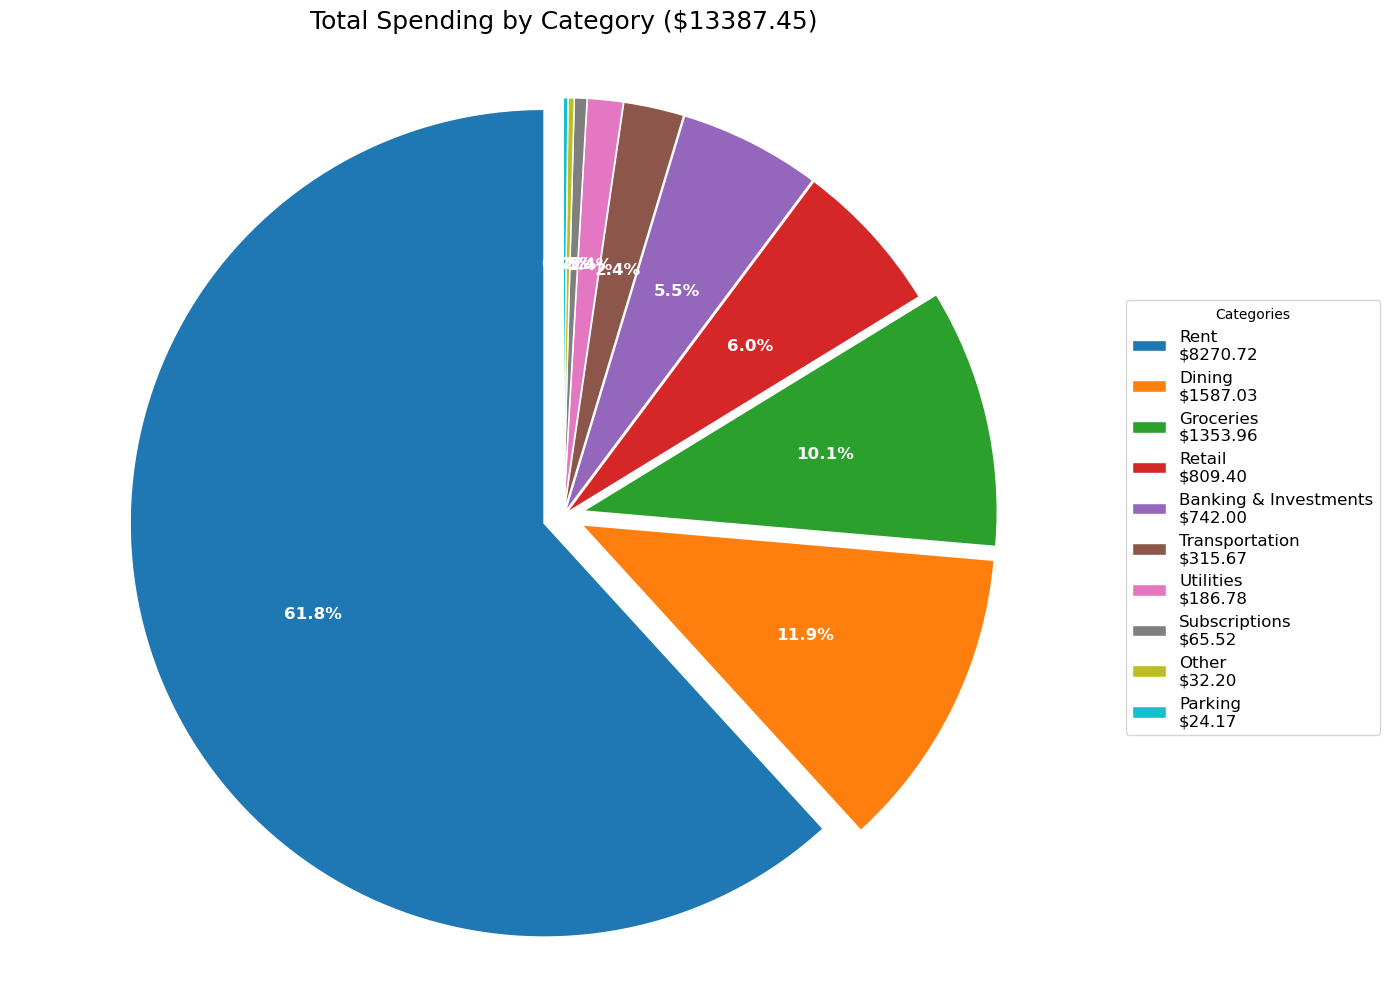

My top 5 spending categories:
Rent: $8270.72
Dining: $1587.03
Groceries: $1353.96
Retail: $809.40
Banking & Investments: $742.00


In [8]:
# Let's see which categories I spent the most on
plot_spending_by_category(bank_data)

# Get exact numbers for top 5 categories
top_5_categories = spending_stats["top_categories"].head()
print("My top 5 spending categories:")
for category, amount in top_5_categories.items():
    print(f"{category}: ${amount:.2f}")

This bar chart shows total spending by category, making it clear that rent dominates my expenses, which is pretty expected, followed by dining and groceries. This visualization highlights areas where I might be able to reduce spending, particularly in the dining category.

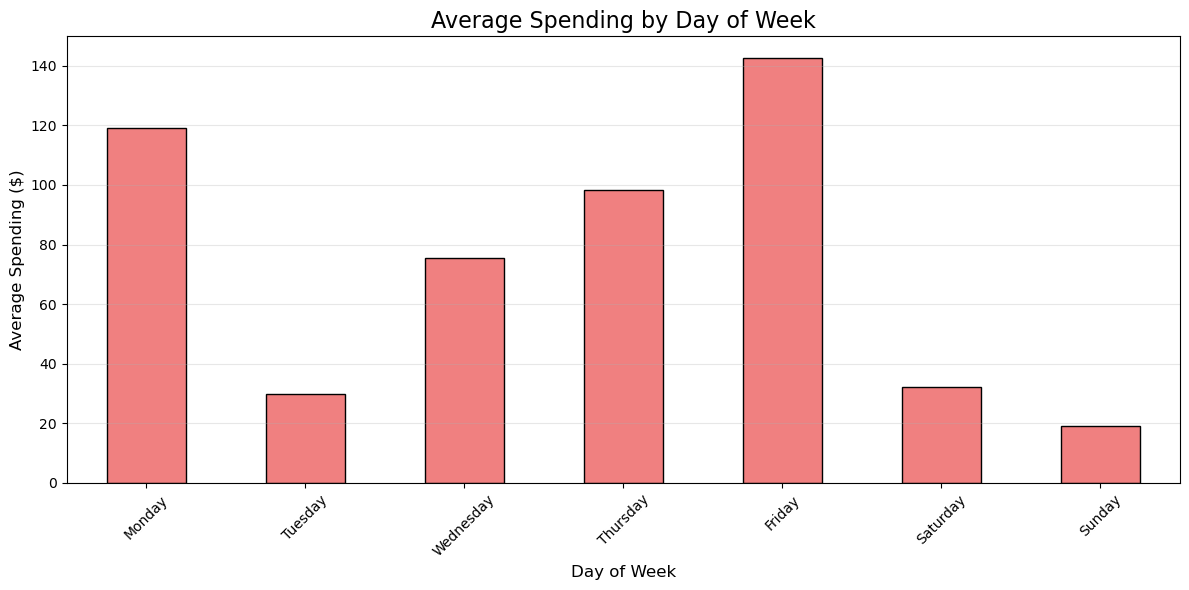

My most expensive day: Friday ($142.73 average)
My cheapest day: Sunday ($19.03 average)


In [9]:
# Let's see if certain days of the week are more expensive than others
plot_spending_by_day(bank_data)

# Find the most and least expensive days
daily_avg = spending_stats["daily_avg"]
print(f"My most expensive day: {daily_avg.idxmax()} (${daily_avg.max():.2f} average)")
print(f"My cheapest day: {daily_avg.idxmin()} (${daily_avg.min():.2f} average)")

This visualization reveals that my spending is not the same throughout the week, not even close! Friday stands out as my highest-spending day, likely because that is the day I go out the most on. Sunday shows the lowest average spending, which makes sense because I normally just stay home and chill on Sundays.

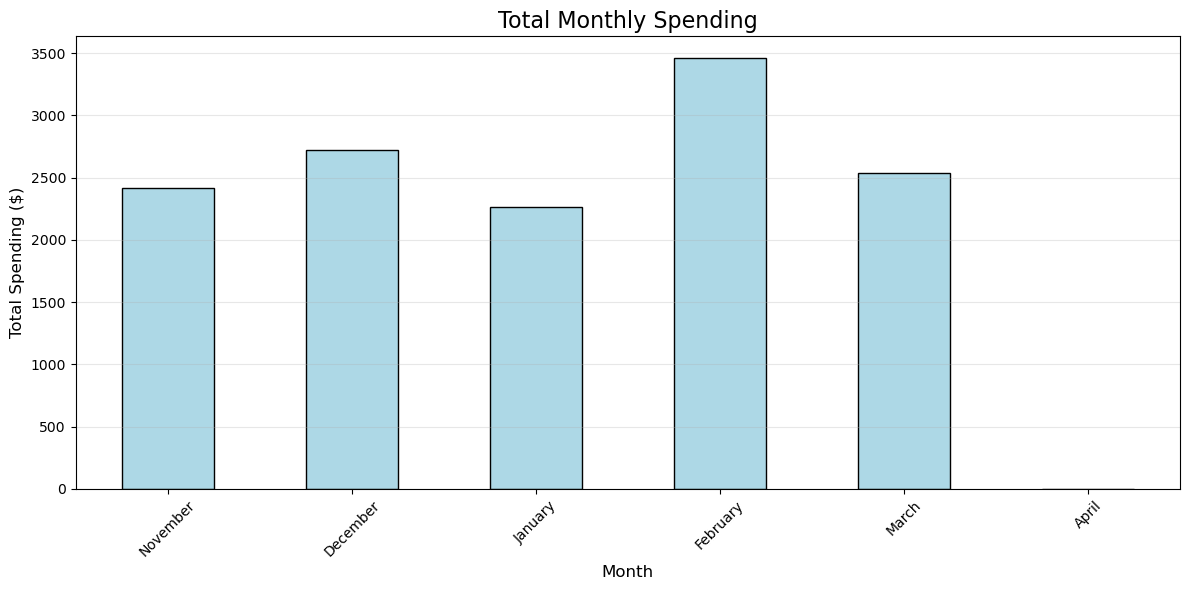

In [10]:
# Monthly trends
monthly_spending = plot_monthly_spending(bank_data)

The monthly trend chart shows significant variation throughout the academic year. February stands out with higher spending most likely due to Valentine's day and going out with my girlfriend. We also see a spike in December likely due to the holidays and then a drop in January possibly reflecting post-holiday budget constraints. There is no spending in April because my data spans to April 1st and my only transaction that day was depositing my paycheck.

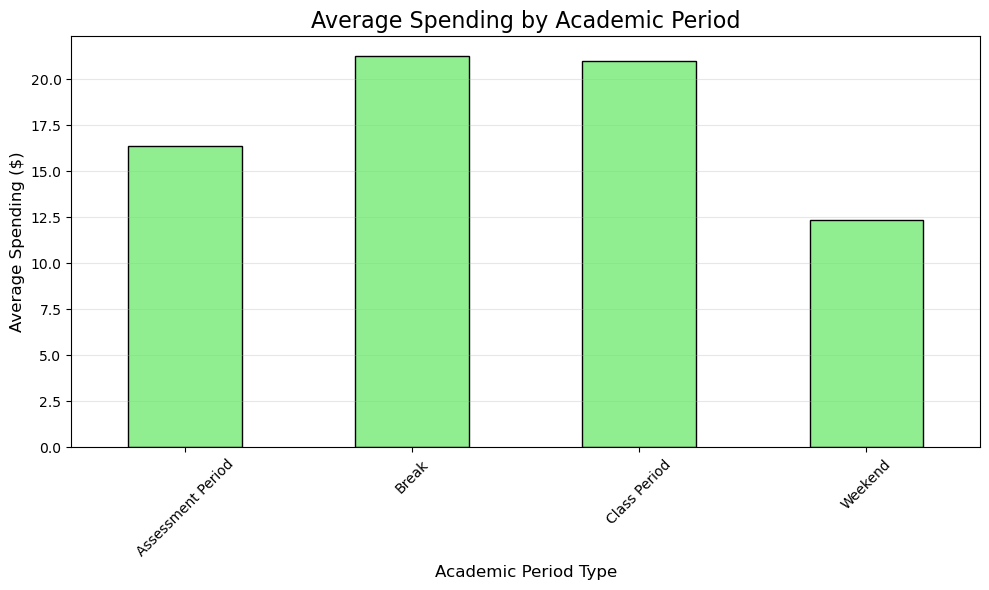

How my spending varies by academic period:


,mean,median,count,sum
period_type,,,,
Break,84.028235,21.260,34,2856.96
Class Period,126.548529,20.975,68,8605.30
Assessment Period,28.055769,16.345,26,729.45
Weekend,23.914800,12.360,50,1195.74



Category breakdown by academic period:


Category,Banking & Investments,Dining,Groceries,Other,Parking,Rent,Retail,Subscriptions,Transportation,Utilities
period_type,,,,,,,,,,
Assessment Period,263.0,155.95,127.28,0.0,0.00,0.00,161.38,21.84,0.00,0.00
Break,55.0,461.79,168.78,10.6,17.12,1680.12,301.22,21.84,5.50,134.99
Class Period,419.0,544.86,594.82,21.6,5.00,6590.60,190.06,21.84,165.73,51.79
Weekend,5.0,424.43,463.08,0.0,2.05,0.00,156.74,0.00,144.44,0.00


In [11]:
# Analyze spending across academic periods
plot_spending_by_period(merged_data)

# Get detailed stats
period_stats, period_category = get_period_spending_statistics(merged_data)

print("How my spending varies by academic period:")
display(period_stats.sort_values(by="median", ascending=False))

print("\nCategory breakdown by academic period:")
display(period_category)

This visualization addresses my central research question by showing how spending varies across different academic contexts. Interestingly, my median transaction amount is highest during Breaks, then Class Period, next Assessment Period, and lastly Weekend. I chose to go with the median due to the fact that most of my data is during the "Class Period". Therefore making it more likely that my large purchases, like rent, would be under that category so I wanted to make the data less skewed. The results do make sense though, I stay in a lot during the weekends so I spend less money and while I'm on break I'm usually back home going out with friends.

## **Statistical Hypothesis Testing**

### Hypothesis Test 1: Weekend vs Weekday Spending

$H_0: \mu_{weekend} = \mu_{weekday}$ (Weekend spending equals weekday spending)

$H_1: \mu_{weekend} \neq \mu_{weekday}$ (Weekend spending differs from weekday spending)

Significance Level: $\alpha = 0.05$

In [12]:
# Run t-test for weekend vs weekday spending
test1 = test_weekend_vs_weekday_spending(merged_data)

# Display stats
print(f"Weekend Mean: ${test1["weekend_mean"]:.2f}, n={test1["weekend_n"]}")
print(f"Weekday Mean: ${test1["weekday_mean"]:.2f}, n={test1["weekday_n"]}")

Weekend Mean: $23.91, n=50
Weekday Mean: $99.31, n=94


Test Statistic: $t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

In [13]:
# Calculate and display
print(f"t-statistic: {test1["t_stat"]:.3f}")
print(f"t-critical: +/- {test1["t_critical"]:.3f} (two-tailed)")
print(f"p-value: {test1["p_value"]:.4f}")

t-statistic: 2.171
t-critical: +/- 2.010 (two-tailed)
p-value: 0.0323


Decision Rule: If t > t-critical, reject $H_0$. Otherwise, do not reject $H_0$

In [14]:
# Make decision
if abs(test1["t_stat"]) > test1["t_critical"]:
    decision = "Reject H0"
else:
    decision = "Do Not Reject H0"
print(decision)

Reject H0


Conclusion: The t-test results indicate that there is a statistically significant difference between my weekend and weekday spending. This information is valuable for budgeting purposes, as it shows I should plan differently for weekends versus weekdays.

### Hypothesis Test 2: Assessment Period vs. Class Period Spending

$H_0: \mu_{assessment} \geq \mu_{class}$ (Assessment period spending is greater than or equal to class period spending)

$H_1: \mu_{assessment} < \mu_{class}$ (Assessment period spending is less than class period spending)

Significance Level: $\alpha = 0.05$

In [15]:
# Run t-test for assessment vs class spending
test2 = test_assessment_vs_class_spending(merged_data)

# Display stats
print(f"Assessment Mean: ${test2["assessment_mean"]:.2f}, n={test2["assessment_n"]}")
print(f"Class Period Mean: ${test2["class_mean"]:.2f}, n={test2["class_n"]}")

Assessment Mean: $28.06, n=26
Class Period Mean: $126.55, n=68


Test Statistic: $t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

In [16]:
# Calculate and display
print(f"t-statistic: {test2["t_stat"]:.3f}")
print(f"t-critical: {test2["t_critical"]:.3f} (one-tailed)")
print(f"p-value: {test2["p_value"]:.4f}")

t-statistic: -2.068
t-critical: 1.708 (one-tailed)
p-value: 0.0212


Decision Rule: If t < t-critical, reject $H_0$. Otherwise, do not reject $H_0$

In [17]:
# Make decision
if test2["t_stat"] < -test2["t_critical"]:
    decision = "Reject H0"
else:
    decision = "Do Not Reject H0"
print(decision)

Reject H0


Conclusion: Based on the t-test results, I can conclude that at the 0.05 significance level, my spending during assessment periods is significantly lower than during regular class periods. This confirms my intuition that I tend to spend less when focused on exams and academic assessments.

### Hypothesis Test 3: Break vs Regular Period Spending

$H_0: \mu_{break} = \mu_{regular}$ (Break spending equals regular period spending)

$H_1: \mu_{break} \neq \mu_{regular}$ (Break spending differs fromm regular period spending)

Significance Level: $\alpha = 0.05$

In [18]:
# Run t-test for break vs regular period spending
test3 = test_break_vs_regular_spending(merged_data)

# Display stats
print(f"Break Mean: ${test3["break_mean"]:.2f}, n={test3["break_n"]}")
print(f"Regular Period Mean: ${test3["regular_mean"]:.2f}, n={test3["regular_n"]}")

Break Mean: $84.03, n=34
Regular Period Mean: $99.31, n=94


Test Statistic: $t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$

In [19]:
# Calculate and display
print(f"t-statistic: {test3["t_stat"]:.3f}")
print(f"t-critical: +/- {test3["t_critical"]:.3f} (two-tailed)")
print(f"p-value: {test3["p_value"]:.4f}")

t-statistic: -0.257
t-critical: +/- 2.035 (two-tailed)
p-value: 0.7983


Decision Rule: If t > t-critical, reject $H_0$. Otherwise, do not reject $H_0$

In [20]:
# Make decision
if abs(test3["t_stat"]) > test3["t_critical"]:
    decision = "Reject H0"
else:
    decision = "Do Not Reject H0"
print(decision)

Do Not Reject H0


Conclusion: Based on the t-test results, I can conclude that there is not a statistically significant difference between my spending during breaks and regular academic periods. Since I don't tend to spend more during breaks, budget allocation won't be necessary.

## **4. Classification Results**

The main classification task in this project is predicting the spending bin of a transaction based on contextual factors. This could help me anticipate the size of future expenses based on academic context.

### Classification Target and Distribution

For this classification, I'm using "Spending_Bin" as my target attribute, which categorizes each transaction into one of four bins (in dollars):

* Small (Less than 10)
* Medium (10-50)
* Large (50-100)
* Very Large (More than 100)

I'm interested in predicting the size of a transaction based on three key features:

* Day of the week (e.g., Monday, Friday)
* Academic Period (Assessment Period, Class Period, Break, Weekend)
* Transaction category (Dining, Groceries, Rent, etc.)

In [21]:
# Prepare data for classification
X_train, X_test, y_train, y_test, class_distribution, encoders = prepare_classification_data(merged_data)

# Display class distribution
print("Distribution of spending categories:")
for bin_name, percentage in class_distribution.items():
    print(f"{bin_name}: {percentage:.1f}%")

Distribution of spending categories:
Medium ($10-$50): 53.4%
Small (Less than $10): 28.1%
Large ($50-$100): 11.2%
Very Large (More than $100): 7.3%


The distribution of classes is unbalanced. Medium transactions (10-50) are most common, followed by Small transactions (less than 10). Large (50-100) and Very Large (more than 100) transactions are less frequent, which could make them harder to predict accurately.

### Classification Hypotheses

Before implementing the classifiers, I made a few hypotheses about the predictions:

1. I expected certain academic periods (like assessment periods) to correlate with smaller transactions, while breaks may correlate with larger transactions.
2. I anticipate that certain days of the week (like Friday) will be more predictive of larger transactions.
3. The transaction category will likely be the strongest predictor of bin size, with categories such as "Rent" always falling into the "Very Large" bin.
4. I expected the kNN classifier might perform better given the categorical nature of my features and the relatively small dataset.

### kNN Classification Results

First, I trained and evaluated a k-Nearest Neighbors classifier:


kNN Classification Results:


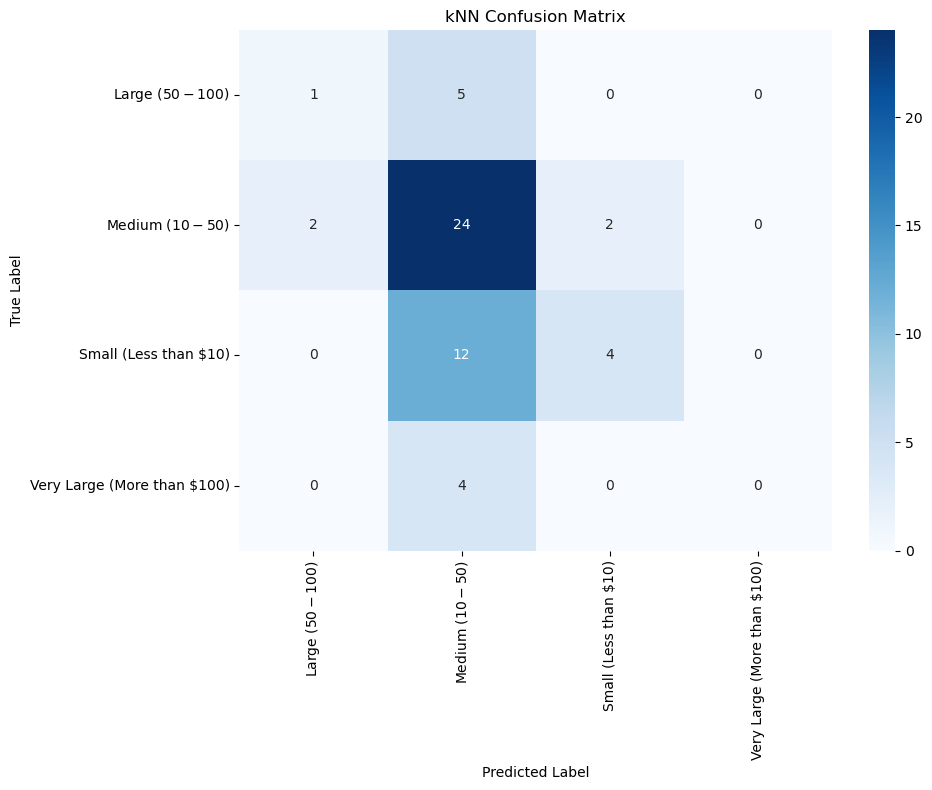

Overall Accuracy: 0.537

Accuracy by Spending Category:
Large ($50-$100): 0.167
Medium ($10-$50): 0.857
Small (Less than $10): 0.250
Very Large (More than $100): 0.000


In [22]:
# Train kNN classifier
knn_model = train_knn_classifier(X_train, y_train, k=5)

# Evaluate kNN classifier
print("\nkNN Classification Results:")
knn_accuracy, knn_class_accuracy = evaluate_classifier(knn_model, X_test, y_test, "kNN")
print(f"Overall Accuracy: {knn_accuracy:.3f}")
print("\nAccuracy by Spending Category:")
for category, acc in knn_class_accuracy.items():
    print(f"{category}: {acc:.3f}")

### Decision Tree Classification Results

Next, I trained and evaluated a Decision Tree classifier:


Decision Tree Classification Results:


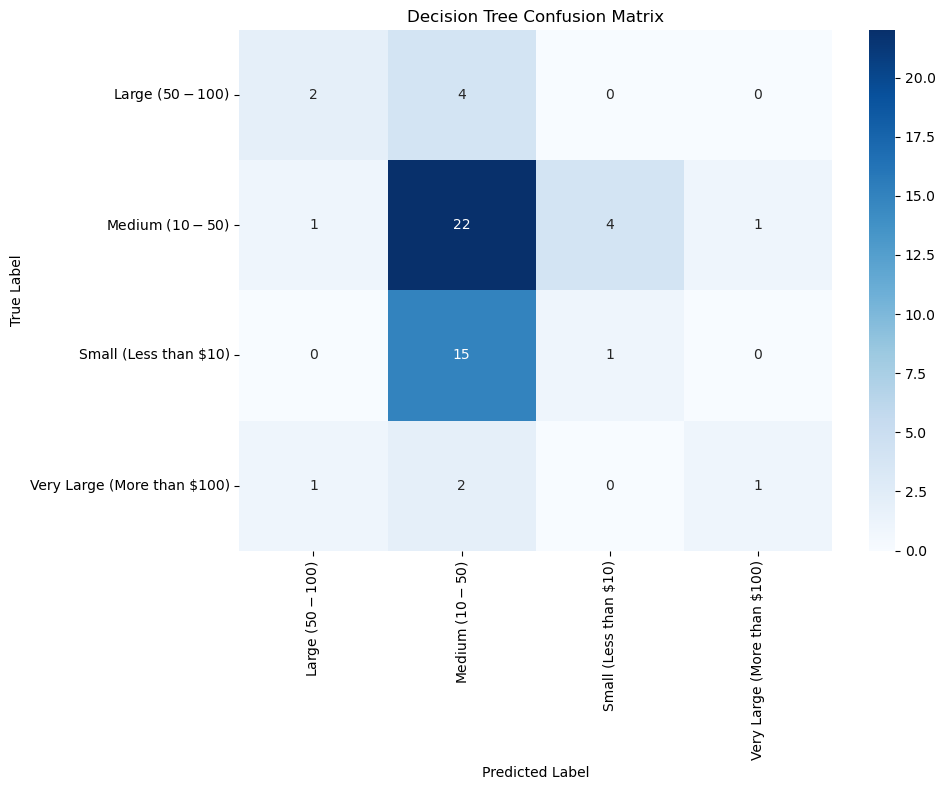

Overall Accuracy: 0.481

Accuracy by Spending Category:
Large ($50-$100): 0.333
Medium ($10-$50): 0.786
Small (Less than $10): 0.062
Very Large (More than $100): 0.250


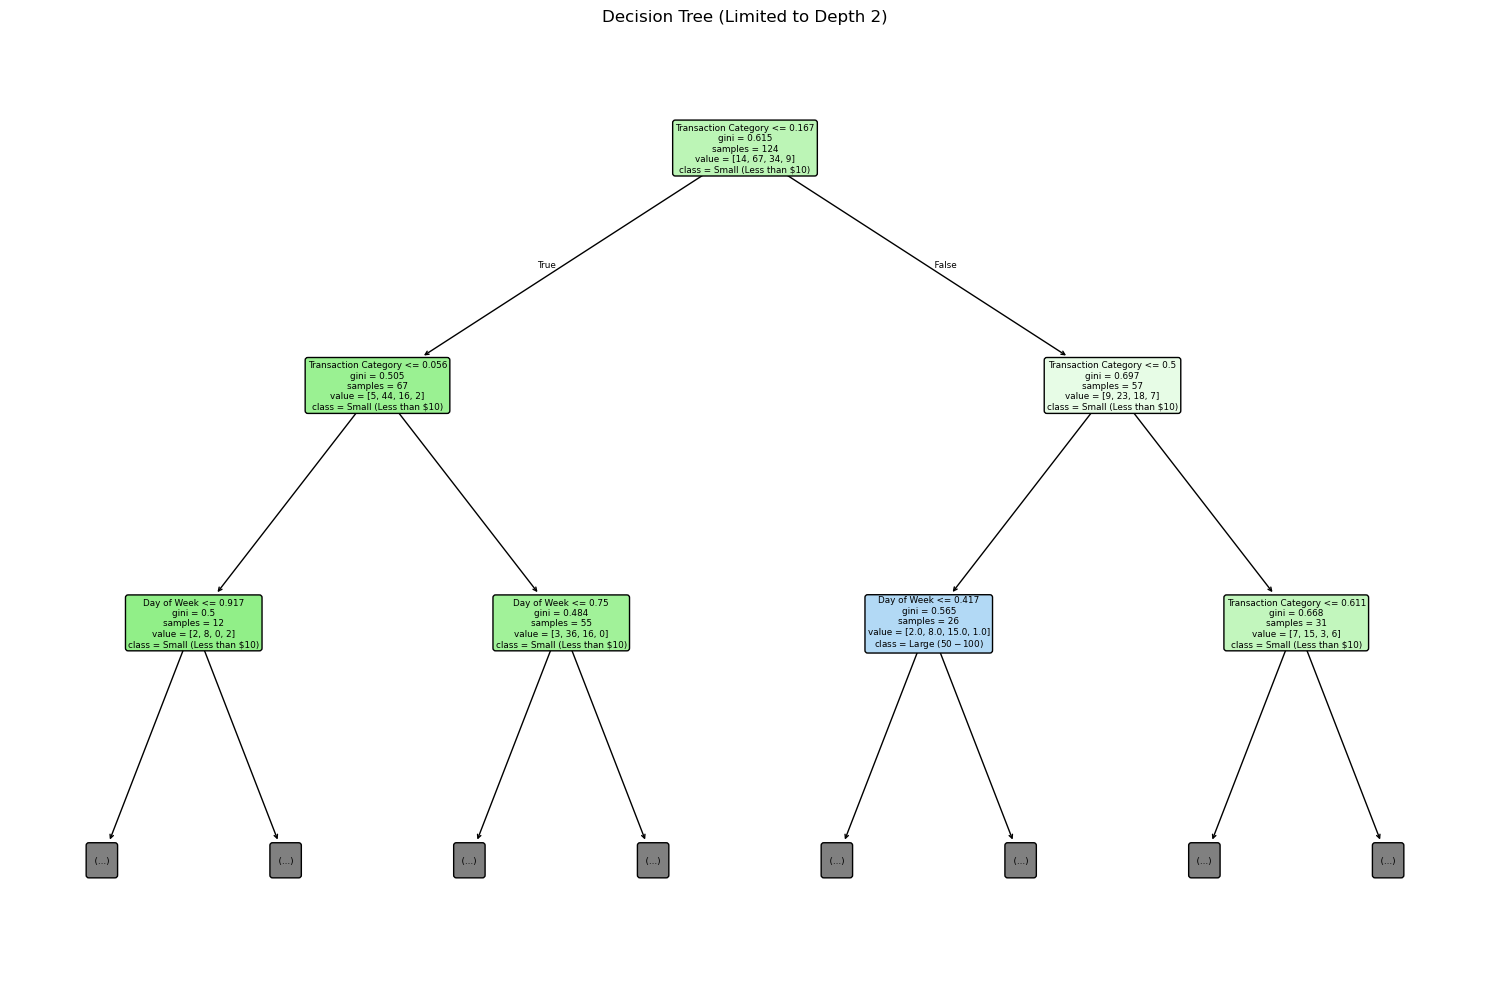

In [23]:
# Train Decision Tree classifier
dt_model = train_decision_tree_classifier(X_train, y_train)

# Evaluate Decision Tree classifier
print("\nDecision Tree Classification Results:")
dt_accuracy, dt_class_accuracy = evaluate_classifier(dt_model, X_test, y_test, "Decision Tree")
print(f"Overall Accuracy: {dt_accuracy:.3f}")
print("\nAccuracy by Spending Category:")
for category, acc in dt_class_accuracy.items():
    print(f"{category}: {acc:.3f}")
    
# Visualize decision tree
feature_names = ["Day of Week", "Academic Period", "Transaction Category"]
class_names = list(class_distribution.index)
visualize_decision_tree(dt_model, feature_names, class_names, max_depth=2)

### Model Comparison and Evaluation

To directly compare the performance of the two classifiers:

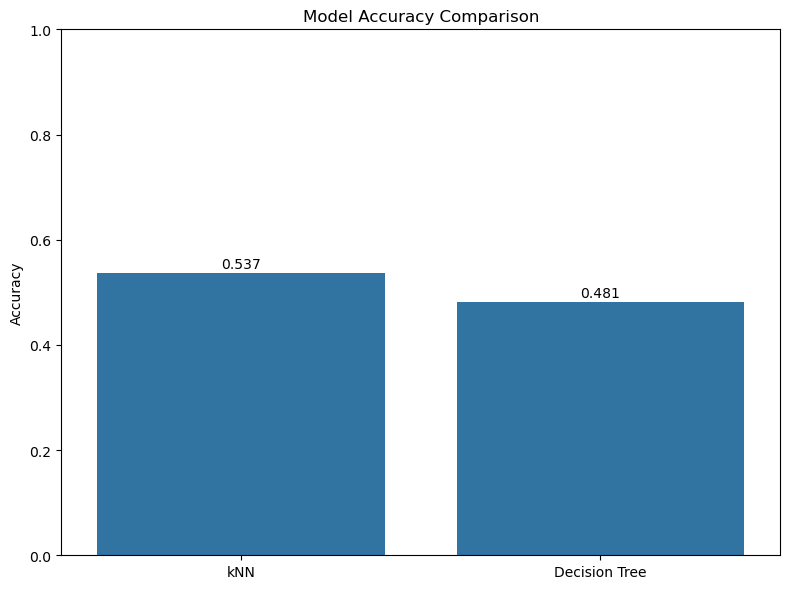

In [24]:
# Compare classifiers
compare_classifier_performance(knn_accuracy, dt_accuracy)

The kNN classifier achieved a higher overall accuracy (53.7%) compared to the Decision Tree (48.1%). However, examining per-class accuracy reveals interesting differences:

* _kNN classifier_: Relatively excelled at predicting Medium transactions (85.7%) but completely fails with Very Large transactions (0% accuracy)
* _Decision Tree classifier_: Shows more balanced performance across classes, with better accuracy on Large (33.3%) and Very Large (25%) transactions compared to kNN

This suggests that while kNN performs better overall, the Decision Tree may be more useful for identifying the less common, larger transactions.

### Classification Challenges

I encountered several challenges during the classification process:

1. _Class imbalance_: The uneven distribution of spending bins made it difficult for models to accurately predict the less common Large and Very Large transactions.
2. _Limited data_: With only 205 transactions spread across four classes and split into training/testing sets, the models had limited examples to learn from.
3. _Parameter tuning_: For both models, parameter selection (k for kNN, max_depth for Decision Tree) significantly affected performance. Finding optimal parameters with limited data was challenging to say the least.
4. _Evaluation complexity_: With four classes and imbalanced data, overall accuracy alone was insufficient to evaluate model performance. I needed to analyze per-class accuracy to get a complete picture.

## **5. Conclusion**

### Classification Approach and Performance

This project demonstrates that my spending behavior shows somewhat predictable patterns related to my academic schedule. The classification task of predicting spending bins based on the day of week, academic period, and transaction category achieved over 50% accuracy with the kNN classifier.

Key findings from the classification results:

1. Both models performed best on Medium transactions, which made up the largest portion of my dataset.
2. The kNN classifier achieved higher overall accuracy (53.7% vs 48.1%) but struggled with less common transaction sizes.
3. The Decision Tree showed more consistent performance across classes, suggesting it might generalize better despite lower overall accuracy.
4. Transaction category emerged as an important predictor, confirming my hypothesis that certain categories strongly correlate with specific spending amounts.

To improve classification performance in future iterations:

1. _Collect more data_: I think this was the biggest factor. A longer timeframe with more transactions would provide more examples for the models
2. _Feature expansion_: Adding time-based features (beginning/end of month, proximity to paydays) could improve predictive power
3. _Bin reduction_: Converting to a three-bin system (Small, Medium, Large) would make the classes more balanced while maintaining meaningful distinctions

### Potential Impacts and Stakeholders

This analysis has several potential impacts for various stakeholders:

For myself and other students: Understanding the relationship between academic schedule and spending patterns can lead to better financial planning. Knowing that I tend to spend less during assessment periods but more during breaks allows me to anticipate needs and budget accordingly.

For university financial advisors: These patterns could inform targeted financial literacy programs. Advisors might help students prepare for higher-spending periods like breaks and develop strategies for managing limited resources during the academic year.

For financial institutions serving students: Banks and credit unions could develop more tailored products and services based on these spending patterns, such as automated savings programs that adjust to academic schedules.

Ethical considerations: This type of financial analysis raises important privacy questions. While my project uses only my personal data for my own benefit, similar analyses by corporations could potentially be used to target vulnerable students with credit offers or unnecessary products. Financial institutions should be transparent about how they use student spending data and prioritize educational over commercial purposes.

### Sources:

* https://www.programiz.com/python-programming/datetime/strftime
* https://www.geeksforgeeks.org/k-nearest-neighbours/
* https://www.datacamp.com/tutorial/decision-tree-classification-python
* https://matplotlib.org/stable/index.html